In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import *


In [2]:
dol = pd.read_csv("dol_dataset.csv")
dol.head()
dol.columns
dol.ld_dt_year.unique()

array([2017, 2016, 2015, 2019, 2018, 2020])

array([2017, 2016, 2015, 2019, 2018, 2020])

In [3]:
## add ratio columns for backwages and CMPS
cmp_df = dol.groupby(['st_cd', 'ld_dt_year', 'total_employment']).agg({'h2a_cmp_assd_amt': ['mean', 'sum', 'count'],
                                                           'h2a_violtn_cnt' : 'sum'})



cmp_df.columns = cmp_df.columns.droplevel(0)
cmp_df.columns = ['h2a_cmp_amt_mean', 'h2a_cmp_amt_sum', 'cmp_cases',
                  'h2a_violtn_cnt_sum']

reset_cmp_df = cmp_df.reset_index()

##ratio of cases actually resulting in civil monetary penalities
reset_cmp_df['amt_pv'] = reset_cmp_df['h2a_cmp_amt_sum'] / reset_cmp_df['h2a_violtn_cnt_sum']
#cmp_df.reset_index()


In [4]:
## filter to select years, regraph and facet by year, add subtitle with descriptive 

reset_cmp_df.ld_dt_year.unique()
years_wanted = [2015, 2017, 2020]

cmp_years = reset_cmp_df.loc[reset_cmp_df.ld_dt_year.isin(years_wanted)].copy()
cmp_years_1 = cmp_years.reset_index()

/opt/conda/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


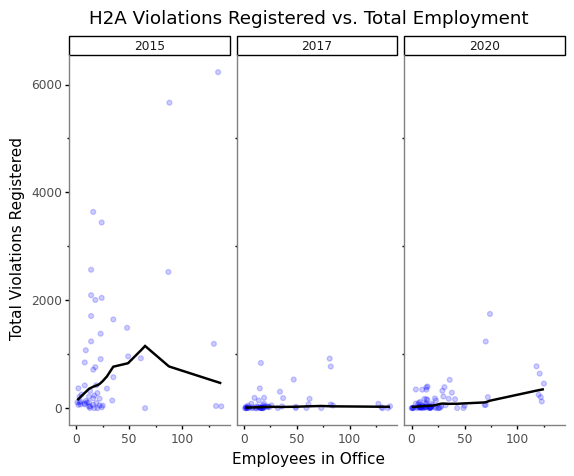

<ggplot: (8745574133333)>

In [5]:
emp_v_cnt = (ggplot(cmp_years_1, aes(x='total_employment', y='h2a_violtn_cnt_sum')) + 
            geom_point(alpha = .2, color = 'blue')) + labs(title = "H2A Violations Registered vs. Total Employment", 
                subtitle = "Violations", x = 'Employees in Office',
                y = 'Total Violations Registered') + theme_classic() + theme(
                axis_line=element_line(color="grey"),
                axis_ticks=element_line(color = "grey")) + facet_wrap('ld_dt_year') + geom_smooth()
emp_v_cnt


/opt/conda/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


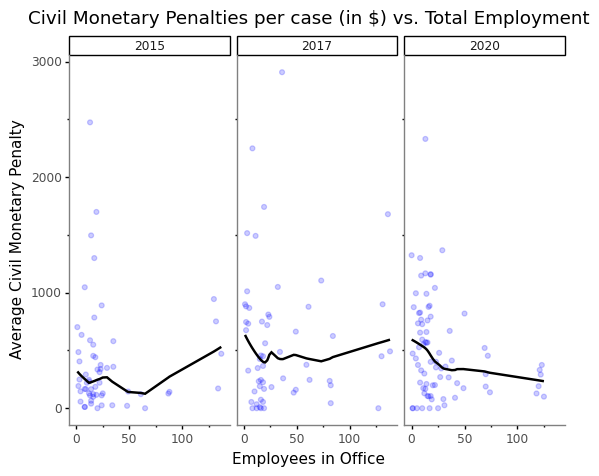

<ggplot: (8786579437038)>

In [5]:
emp_v_pv = (ggplot(cmp_years_1, aes(x='total_employment', y='amt_pv')) + 
            geom_point(alpha = .2, color = 'blue')) + labs(title = "Civil Monetary Penalties per case (in $) vs. Total Employment", 
                x = 'Employees in Office', y = 'Average Civil Monetary Penalty') + theme_classic() + theme(axis_line=element_line(color="grey"),
                axis_ticks=element_line(color = "grey")) + facet_wrap('ld_dt_year') + geom_smooth()
emp_v_pv

In [6]:
cmp_years_1['pursued'] = cmp_years_1['cmp_cases'] / cmp_years_1['h2a_violtn_cnt_sum']

In [6]:
bw_df = dol.groupby(['st_cd', 'ld_dt_year', 'total_employment']).agg({'h2a_bw_atp_amt': ['mean', 'sum', 'count'],
                                                           'h2a_violtn_cnt' : 'sum'})

bw_df.columns = bw_df.columns.droplevel(0)
bw_df.columns = ['h2a_bw_amt_mean', 'h2a_bw_amt_sum', 'bw_cases',
                  'h2a_violtn_cnt_sum']

reset_bw_df = bw_df.reset_index()

##ratio of cases actually resulting in civil monetary penalities
reset_bw_df['amt_pv'] = reset_bw_df['h2a_bw_amt_sum'] / reset_bw_df['h2a_violtn_cnt_sum']
#cmp_df.reset_index()

reset_bw_df.head()

,st_cd,ld_dt_year,total_employment,h2a_bw_amt_mean,h2a_bw_amt_sum,bw_cases,h2a_violtn_cnt_sum,amt_pv
0,AL,2015,22,3315.402727,36469.43,11,177,206.041977
1,AL,2016,22,0.000000,0.00,7,13,0.000000
2,AL,2017,22,6017.900000,24071.60,4,25,962.864000
3,AL,2018,22,294.046667,1764.28,6,84,21.003333
4,AL,2019,22,0.000000,0.00,2,2,0.000000


In [7]:
bw_years = reset_bw_df.loc[reset_bw_df.ld_dt_year.isin(years_wanted)].copy()
bw_years_1 = bw_years.reset_index()

/opt/conda/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/conda/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


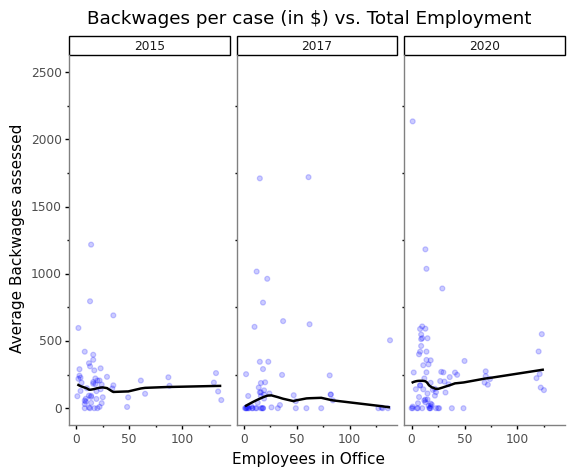

<ggplot: (8786556177734)>

In [8]:
bw_emp_v_pv = (ggplot(bw_years_1, aes(x='total_employment', y='amt_pv')) + 
            geom_point(alpha = .2, color = 'blue')) + labs(title = "Backwages per case (in $) vs. Total Employment", 
                x = 'Employees in Office', y = 'Average Backwages assessed') + theme_classic() + theme(axis_line=element_line(color="grey"),
                axis_ticks=element_line(color = "grey")) + facet_wrap('ld_dt_year') + geom_smooth() + ylim(0,2500)
bw_emp_v_pv

In [40]:
bw_years_1['pursued'] = bw_years_1['bw_cases'] / bw_years_1['h2a_violtn_cnt_sum']

In [9]:
target_states = ['AL', 'TN','TX','MS', 'LA', 'KY']
dol_target = dol.loc[dol.st_cd.isin(target_states)].copy()


## want graph that has one line of total employees and other line of total violations 
## second version has proportion of backwages 

## make prop column



In [10]:
dol_target_reset = dol_target.reset_index()


In [11]:
bw = dol_target.loc[dol_target["h2a_bw_atp_amt"] != 0]
cmp = dol_target.loc[dol_target["h2a_cmp_assd_amt"] != 0]

In [12]:
### dataset for bw trends

target_grouped_bw= bw.groupby(['st_cd', 'ld_dt_year']).agg({'h2a_bw_atp_amt': ['mean', 'sum', 'count'], 
                                                           'h2a_violtn_cnt' : 'sum'})


target_grouped_bw.columns = ['h2a_bw_amt_mean', 'h2a_bw_amt_sum', 'bw_cases', 'h2a_violtn_cnt_sum']

reset_target_bw_df = target_grouped_bw.reset_index().copy()

#reset_target_df["total_counts"] = reset_target_df['bw_cases'] + reset_target_df['cmp_cases']

reset_target_bw_df['pursued_bw'] = reset_target_bw_df['bw_cases'] / reset_target_bw_df['h2a_violtn_cnt_sum']


In [13]:
## dataset for cmp trends

target_grouped_cmp = cmp.groupby(['st_cd', 'ld_dt_year']).agg({'h2a_cmp_assd_amt': ['mean', 'sum', 'count'], 
                                                           'h2a_violtn_cnt' : 'sum'})


target_grouped_cmp.columns = ['h2a_bw_amt_mean', 'h2a_bw_amt_sum', 'cmp_cases', 'h2a_violtn_cnt_sum']

reset_target_cmp_df = target_grouped_cmp.reset_index().copy()

#reset_target_df["total_counts"] = reset_target_df['bw_cases'] + reset_target_df['cmp_cases']

reset_target_cmp_df['pursued_cmp'] = reset_target_cmp_df['cmp_cases'] / reset_target_cmp_df['h2a_violtn_cnt_sum']

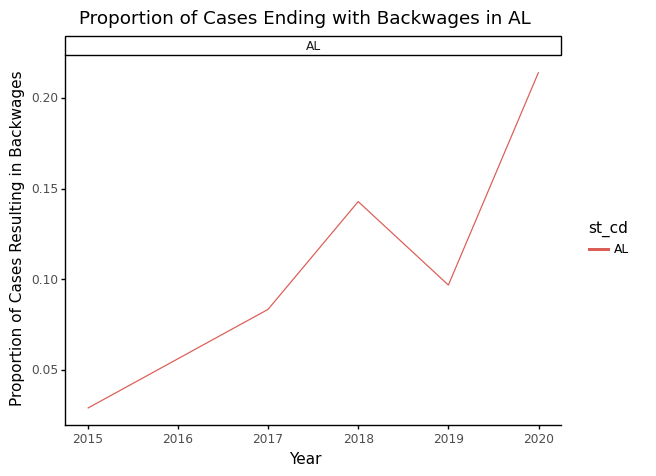

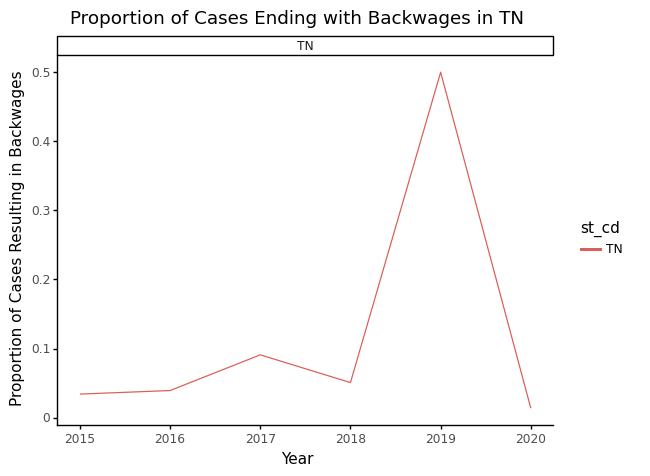

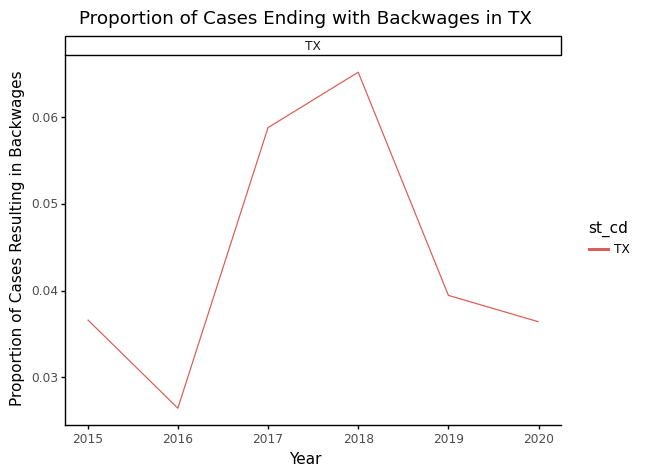

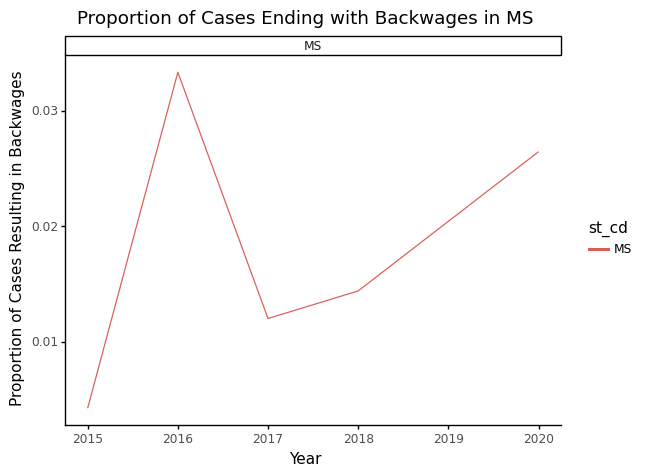

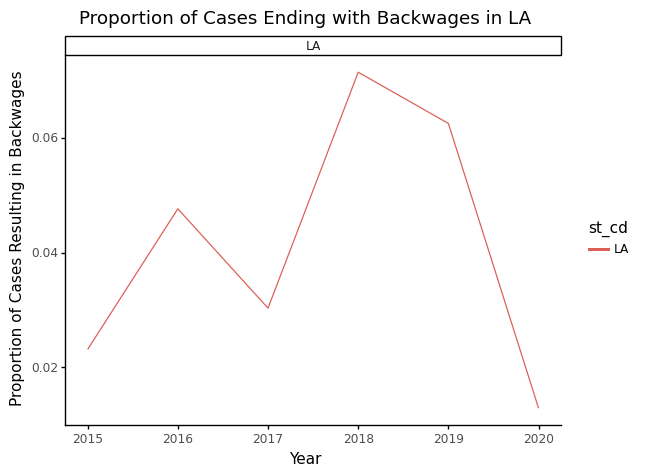

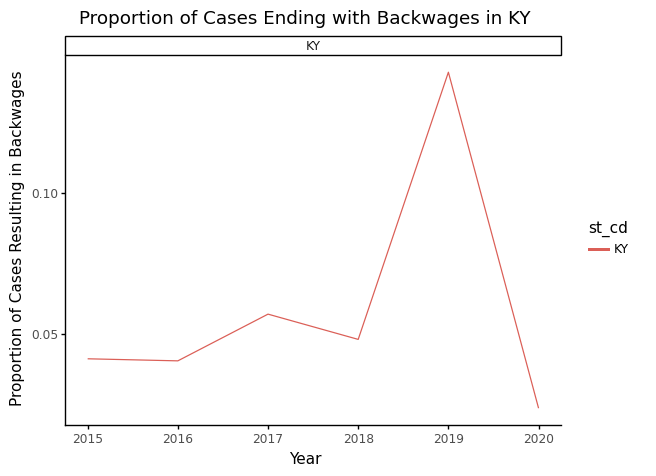

In [14]:
for state in target_states:
    filtered_frame = reset_target_bw_df[reset_target_bw_df["st_cd"] == state]
    plot = (ggplot(filtered_frame, aes(x= 'ld_dt_year', y = "pursued_bw", color = "st_cd")))+ labs(
    title = "Proportion of Cases Ending with Backwages in {}".format(state), 
    x = "Year", y = "Proportion of Cases Resulting in Backwages") + facet_wrap('st_cd') + geom_line() + theme_classic()
    print(plot)


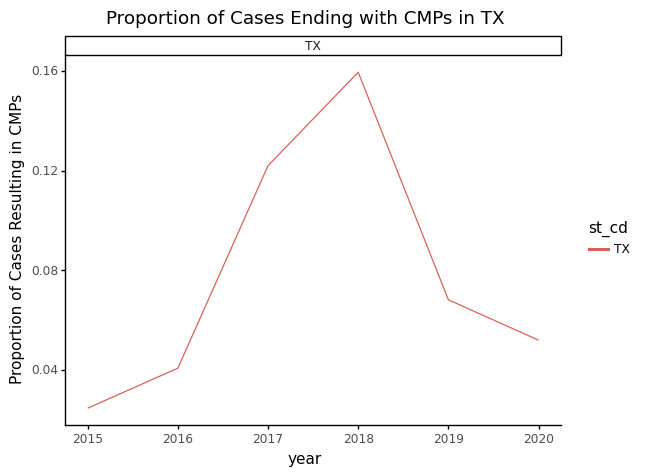

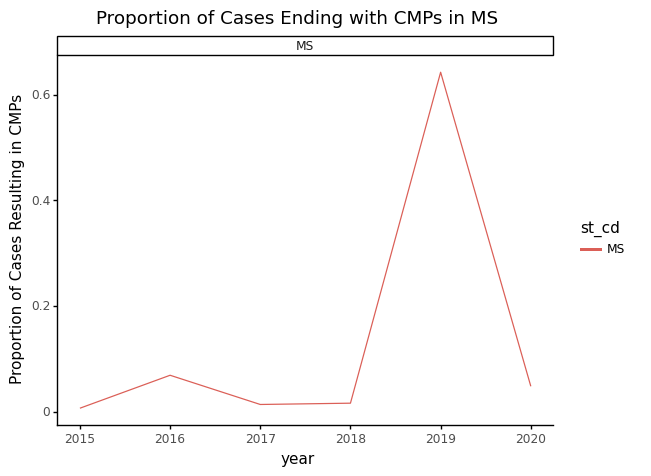

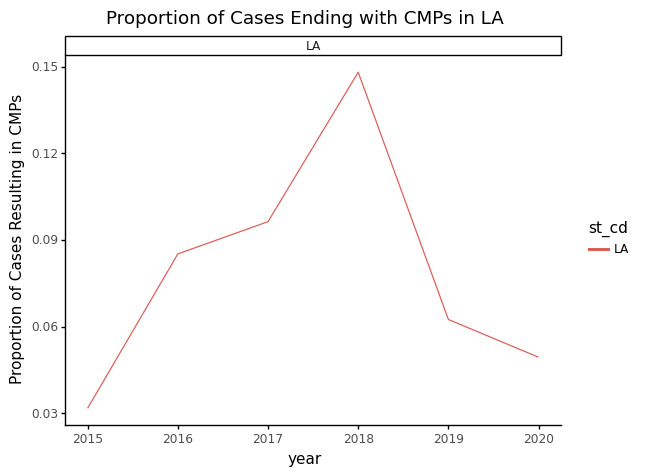

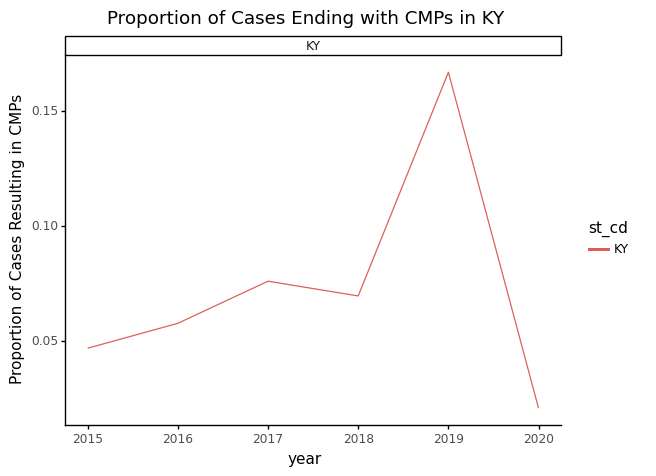

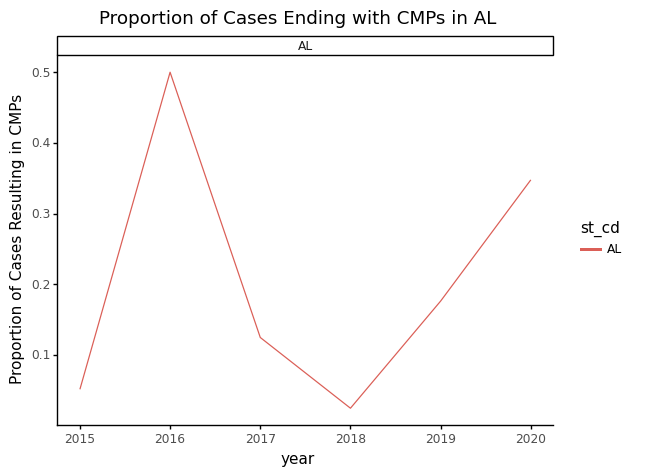

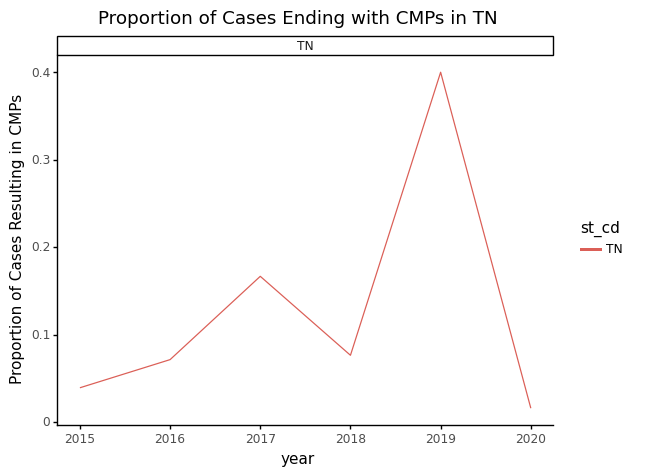

In [33]:
for state in target_states:
    filtered_frame = reset_target_cmp_df[reset_target_cmp_df["st_cd"] == state]
    plot = (ggplot(filtered_frame, aes(x= 'ld_dt_year', y = "pursued_cmp", color = "st_cd")))+ labs(
    title = "Proportion of Cases Ending with CMPs in {}".format(state),
        x = "year", y = "Proportion of Cases Resulting in CMPs") + facet_wrap('st_cd') + geom_line() + theme_classic()
    print(plot)

In [28]:
target_grouped_emp= dol_target_reset.groupby(['st_cd', 'ld_dt_year']).agg({'total_employment': 'median'})

target_grouped_emp_rs = target_grouped_emp.reset_index()

/opt/conda/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


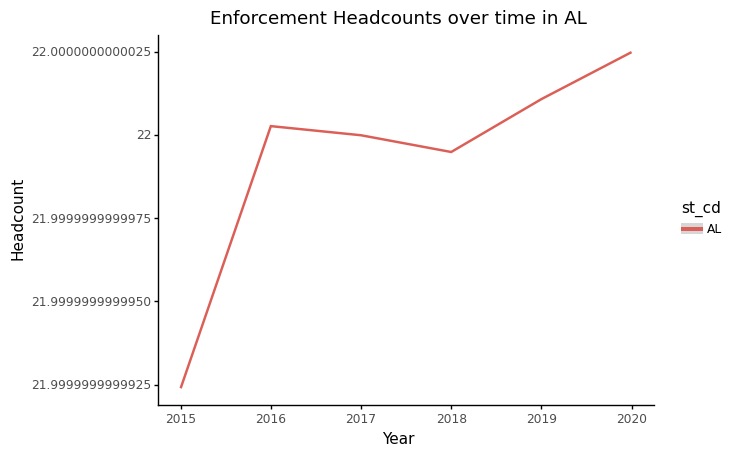

/opt/conda/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


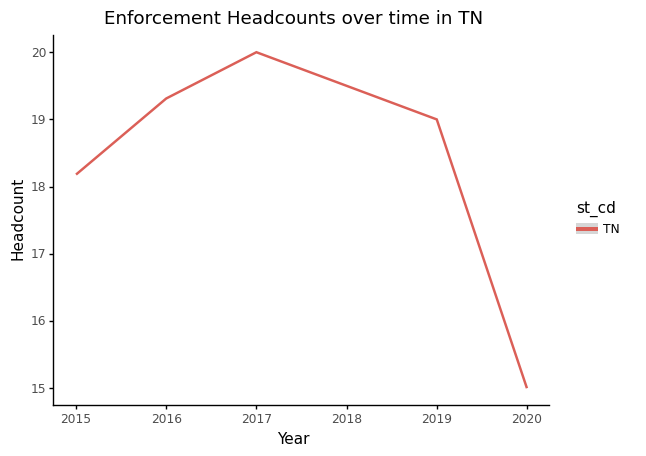

/opt/conda/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


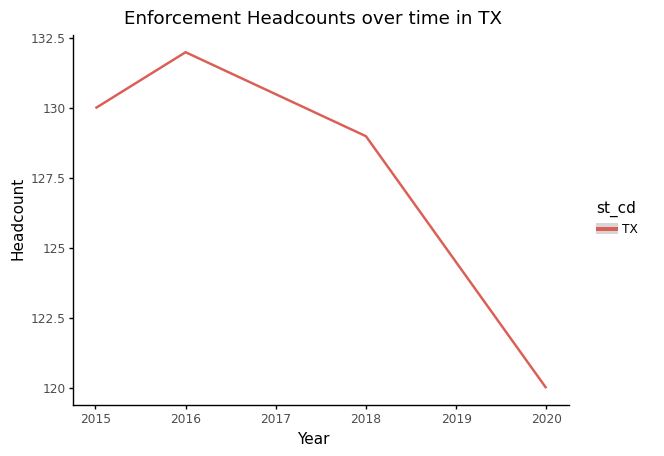

/opt/conda/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


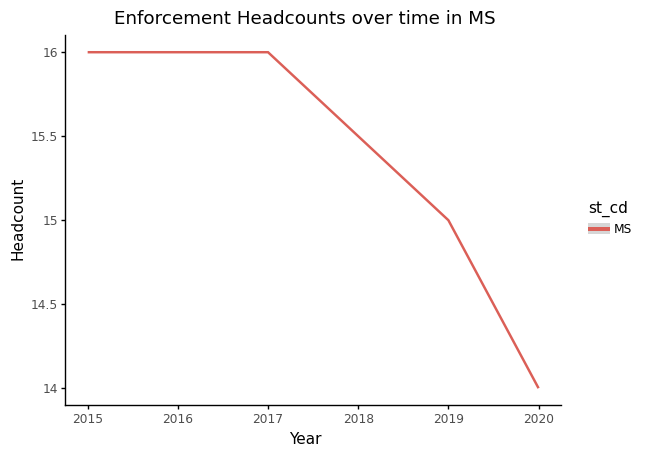

/opt/conda/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


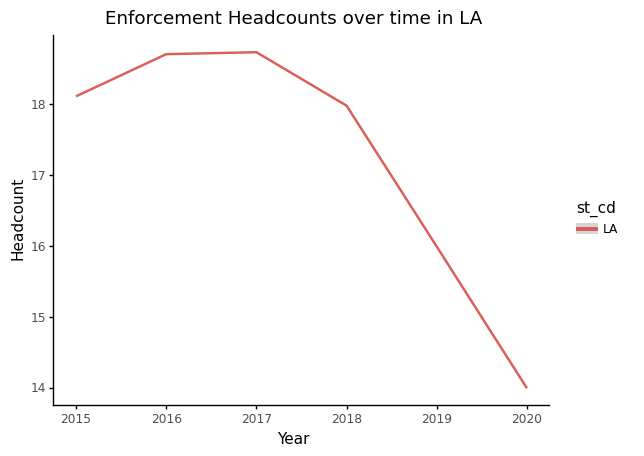

/opt/conda/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


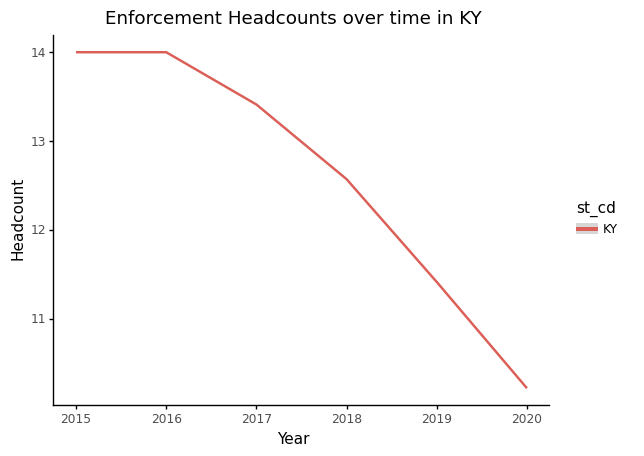

In [31]:
for state in target_states:   
    frame = target_grouped_emp_rs[target_grouped_emp_rs["st_cd"] == state]
    plot = (ggplot(frame, aes(x= 'ld_dt_year', y = "total_employment", color = "st_cd"))) + labs(
    title = "Enforcement Headcounts over time in {}".format(state), x = "Year", 
        y = "Headcount") + geom_smooth() + theme_classic()
    print(plot)

In [23]:
## CSVs for regression analysis


cmp_csv = dol.groupby(['st_cd', 'ld_dt_year']).agg({'h2a_cmp_assd_amt': ['mean', 'sum', 'count'],
                                                           'h2a_violtn_cnt' : 'sum', 'total_employment': 'sum'})

rcmp_csv = cmp_csv.reset_index()

rcmp_csv.to_csv("rcmp_csv.csv")

bw_csv = dol.groupby(['st_cd', 'ld_dt_year']).agg({'h2a_bw_atp_amt': ['mean', 'sum', 'count'],
                                                           'h2a_violtn_cnt' : 'sum', 'total_employment': 'sum',
                                                  'total_employment': 'sum'})

rbw_csv = bw_csv.reset_index()

rbw_csv.to_csv("rbw_csv.csv")